<a href="https://colab.research.google.com/github/AshutoshDhungana/hate_speech_NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path = '/content/drive/MyDrive/Dataset_colab/twitter_hate_speech.csv'
df = pd.read_csv(path)

In the given CSV the polarity has alrady been classfied in the dataset,
the polarity indicates the type of tweet it is Neutral, Positive or Negative

In this data set it is classified as follows:<br>
<br>
0 = negative, <br>
2 = neutral,  <br>
4 = positive

In [3]:
df.head()


,polarity,"""tweet_id""","""date""","""Query""","""username""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.tail()

,polarity,"""tweet_id""","""date""","""Query""","""username""","""text_of_tweet"""
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   polarity          1600000 non-null  int64 
 1    "tweet_id"       1600000 non-null  int64 
 2    "date"           1600000 non-null  object
 3    "Query"          1600000 non-null  object
 4    "username"       1600000 non-null  object
 5    "text_of_tweet"  1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.columns

Index(['polarity', ' "tweet_id"', ' "date"', ' "Query"', ' "username"',
       ' "text_of_tweet"'],
      dtype='object')

In [7]:
df[' "Query"'].value_counts("NO_QUERY")

,proportion
"""Query""",
NO_QUERY,1.0


The 'Query' column of the dataset seems to contains only the value "NO_QUERY", so we can delete that column.

In [8]:
df.drop(columns = [' "Query"'], inplace = True)

In [9]:
df.head()

,polarity,"""tweet_id""","""date""","""username""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


The username, date and the tweet_id are also something we dont require so we can eliminate those column too

In [10]:
df.drop(columns = [' "username"'], inplace = True)

In [11]:
df.drop(columns = [' "date"'], inplace = True)

In [12]:
df.drop(columns = [' "tweet_id"'], inplace = True)

In [13]:
df.head()

,polarity,"""text_of_tweet"""
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


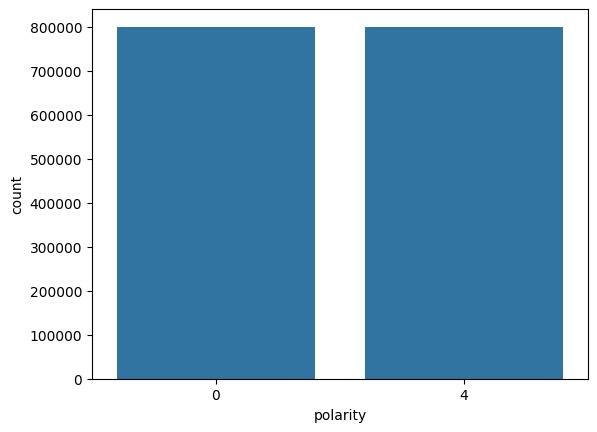

In [14]:
sns.countplot(x = df['polarity'])
plt.show()

From the above histogram we can see that there are tweets of either Negative or Positive tweets, without any Neutral tweets

Splitting the dataset into test and train sets


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df[' "text_of_tweet"'], df['polarity'], test_size = 0.2, random_state = 42)


In [17]:
print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 1280000
Test set size: 320000


#**Cleaning the Tweet text**

####We cleaned the tweets by:
1. Removed any urls
2. Removed the Punctuations and Symbols
3. Converted the text to Lower Case
4. Removed the stop words

In [18]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):

  tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # Remove URLs
  tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation and symbols
  tweet = tweet.lower()  # Convert to lowercase
  tweet = ' '.join([word for word in tweet.split() if word not in stop_words])  # Remove stop words
  return tweet


x_train = x_train.apply(clean_tweet)
x_test = x_test.apply(clean_tweet)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Wordcloud for Most Common Words

After cleaning the tweets we used the WordCloud library to create the visual image (wordcloud) of the most frequent words used, the Most Frequent words are seen larger in font as compared to the less frequent once which are in smaller font sizes.


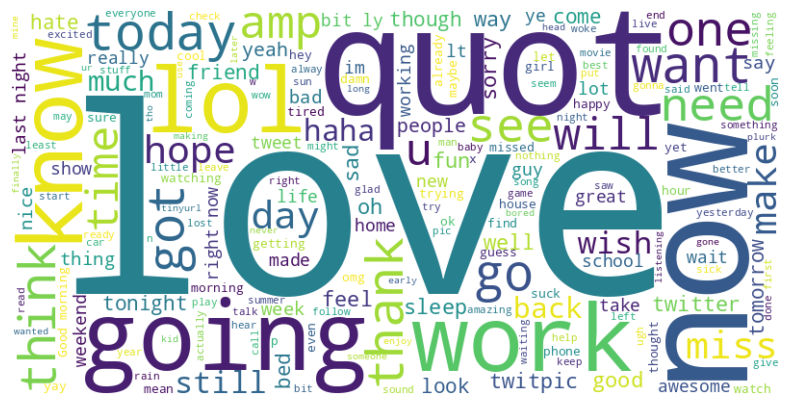

In [19]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into a single string
all_tweets = ' '.join(df[' "text_of_tweet"'].tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##Creating word clouds for the Negative tweets
We created the wordcloud for the tweets for the polarity 0.


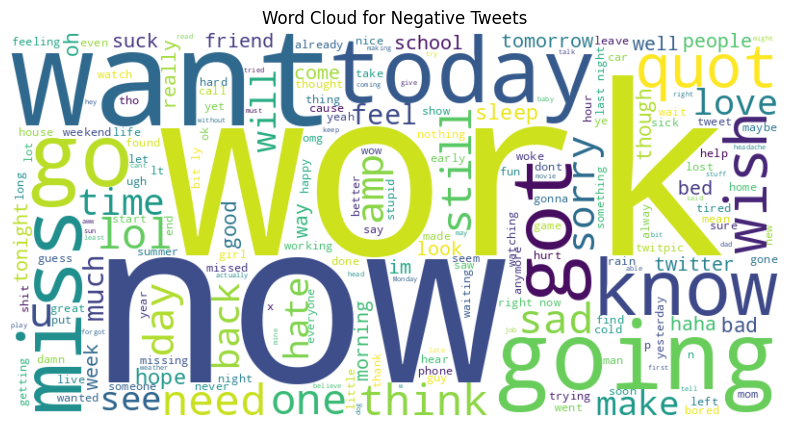

In [20]:
# Tweets with polarity 0
negative_tweets = df[df['polarity'] == 0][' "text_of_tweet"'].astype(str)

# Combine negative tweets into a single string
negative_text = " ".join(negative_tweets)


negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud for negative tweets
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Tweets")
plt.show()


##Creating word clouds for the Positive tweets
We created the wordcloud for the tweets for the polarity 4.


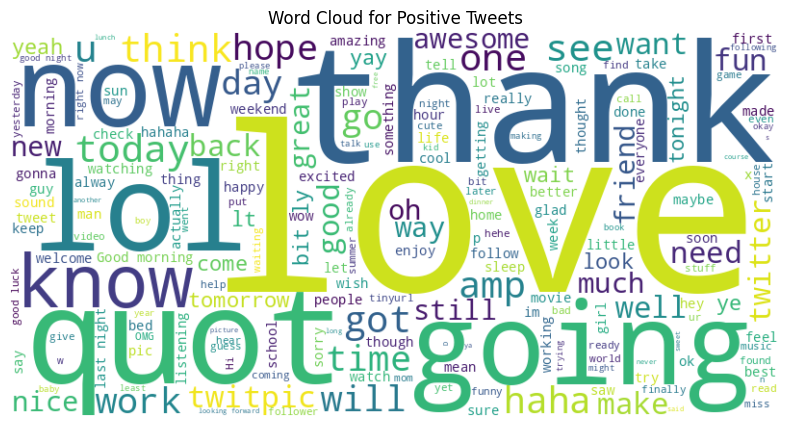

In [21]:
# prompt: now create the word cloud for the "text_of_tweet"' with the polarity 4

# Filter tweets with polarity 4
positive_tweets = df[df['polarity'] == 4][' "text_of_tweet"'].astype(str)

# Combine positive tweets into a single string
positive_text = " ".join(positive_tweets)

# Generate the word cloud for positive tweets
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud for positive tweets
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Tweets")
plt.show()


#Create a bag of words
####Next, we will use a count vectorizer from the Scikit-learn library.

This will transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Transform the test data (using the vocabulary learned from the training data)
x_test_tfidf = vectorizer.transform(x_test)


#Running Algorithm in the Vectorized data


##**1. Bernoulli Naive Bayes Algorithm**

Accuracy: 0.76336875


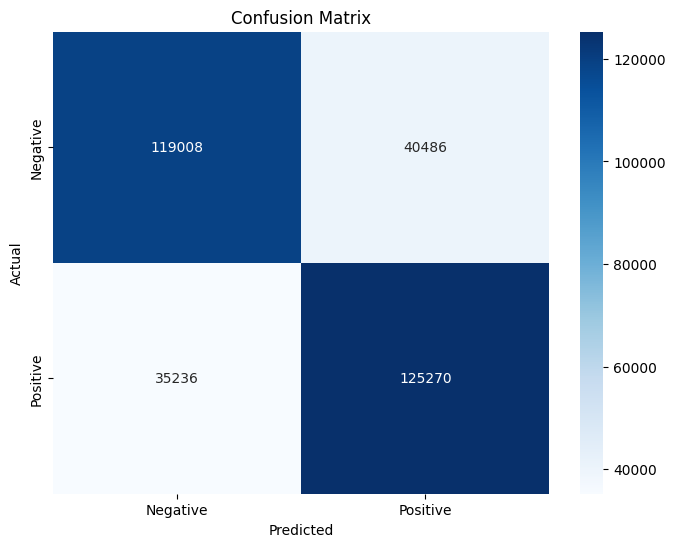

ROC AUC: 0.8395584717848782


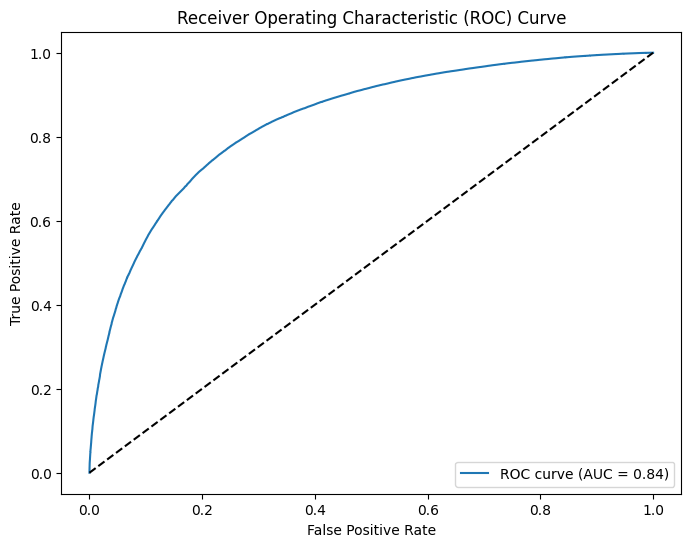

In [23]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


# Create and train the Bernoulli Naive Bayes model
bnb_model = BernoulliNB()
bnb_model.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = bnb_model.predict(x_test_tfidf)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate predicted probabilities for ROC-AUC
y_pred_proba = bnb_model.predict_proba(x_test_tfidf)[:, 1]

# Replace 4 with 1 in y_test for ROC AUC calculation
y_test_binary = y_test.replace(4, 1) #This line fixes the error by changing all 4s to 1s

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_proba) #Now this will run successfully with the correctly formatted target values
print(f"ROC AUC: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba) #Now this will run successfully with the correctly formatted target values

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
# prompt: find the classification report for Bernoulli Naive Bayes

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           4       0.76      0.78      0.77    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



## **2. SVM (Support Vector Machines, Logistic Regression) ***

Accuracy: 0.773615625


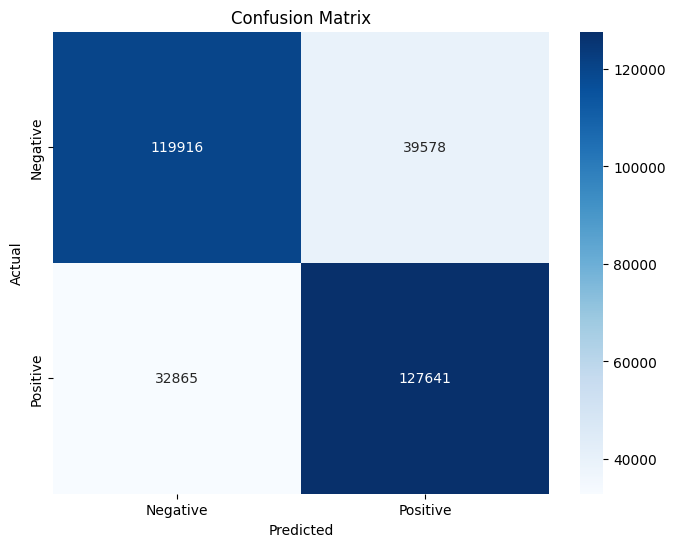

ROC AUC: 0.8546158929662019


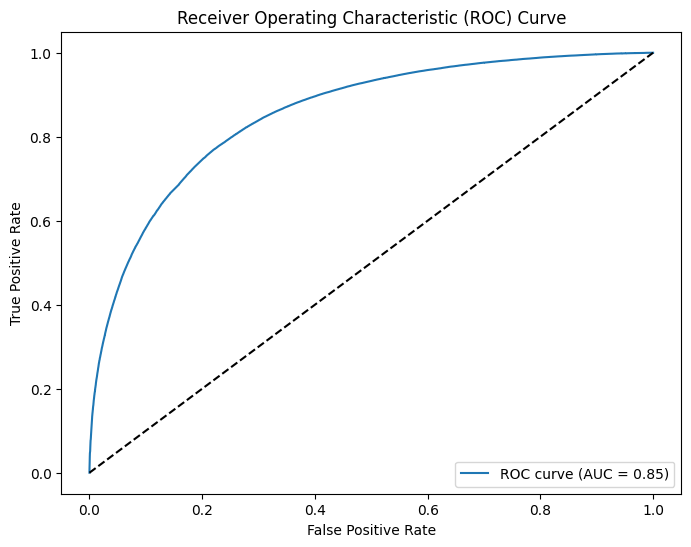

In [25]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model (SVM with a linear kernel)
svm_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
svm_model.fit(x_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test_tfidf)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate predicted probabilities for ROC-AUC
y_pred_proba = svm_model.predict_proba(x_test_tfidf)[:, 1]

# Replace 4 with 1 in y_test for ROC AUC calculation
y_test_binary = y_test.replace(4, 1)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
print(f"ROC AUC: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
# prompt: find the classification for the SVM

# Generate the classification report for the SVM model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.75      0.77    159494
           4       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



#Choosing the Appropriate Algorithm
After looking at the accuracy scores, the ROC AUC score and the ROC curve and the confusion matric we can see that the Bernoulli Naive Bayes Algorithm lacks when compared to SVM (Supported Vector Machine, Logistic Regression).

Therefore, we can conclude that for a NL Sentiment analysis task like this the sppropriate algorithm is SVM (Supported Vector Machine, Logistic Regression)
